In [321]:
import logging
logging.basicConfig(level=logging.DEBUG)
from collections import defaultdict

def dprint(*args, **kwargs):
#     logging.debug(*args, **kwargs)
    print(*args, **kwargs)
    

In [322]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
def createDataSet():
    group = np.array([[1.0,1.1],
                     [1.0, 1.0],
                     [0, 0],
                     [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

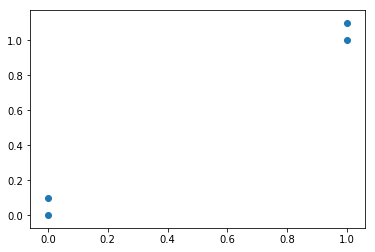

In [324]:
group, labels = createDataSet()
plt.scatter(group[:,0], group[:,1])

In [325]:
np.tile([1,2], (4,1))

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [326]:
a=np.array([4,5,2,1,3])
a=a.argsort()
a

array([3, 2, 4, 0, 1])

In [327]:
class KNN:
    def classify0(inX, dataSet, labels, k):
        dataSetSize = dataSet.shape[0]
#         diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
        diffMat = inX - dataSet  # using broadcast
        square_diff_mat = diffMat**2
#         dprint(square_diff_mat)
        dis_square = square_diff_mat.sum(axis = 1)
#         dprint(dis_square)
        distance = dis_square ** 0.5
#         dprint(distance)
        sortedDistIndices = distance.argsort()
#         dprint(sortedDistIndices)

        classCount = defaultdict(int)
        for i in range(k):
            votelabel = labels[sortedDistIndices[i]]
            classCount[votelabel] += 1
#         dprint(classCount)
        classCount = sorted(classCount.items(),
                                  key=lambda p: p[1], reverse=True)
#         dprint(classCount)
        return classCount[0][0]

In [328]:
inX = [0.0, 0.0]
KNN.classify0(inX, group, labels, 3)

'B'

In [329]:
inX = [1.0, 1.2]
KNN.classify0(inX, group, labels, 3)

'A'

loading dating data

In [330]:
s='123.4'
s.isdigit()

False

In [331]:
def file2matrix(file):
    class2num = {'largeDoses':0, 'smallDoses':1, 'didntLike':2}
    data_list = []
    labels_list = []
    with open(file, 'r') as f:
        for line in f:
            line = line.split()
#             dprint(line)
            data_list.append( [float(e) for e in line[:3]])
            if line[-1].isdigit():
                labels_list.append(line[-1])
            else:
                labels_list.append(class2num[line[-1]])
                
    return data_arr, labels_list   
            

In [332]:
data_arr, labels_list = file2matrix('datingTestSet.txt')
dprint(data_arr[:10])
dprint(labels_list[:10])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]]
[0, 1, 2, 2, 2, 2, 0, 0, 2, 0]


In [333]:
def autoNorm(dataSet):
    # each column min and max, corresponding to each feature
    minVals = dataSet.min(0)
#     dprint(minVals)
    maxVals = dataSet.max(0)
#     dprint(maxVals)
    ranges = maxVals - minVals
    norm_dataset = (dataSet - minVals) / ranges
    return norm_dataset, ranges, minVals

In [334]:
norm_data, ranges, min_vals = autoNorm(data_arr)
norm_data

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

testing on train data

In [335]:
def datingClassTestOnTrainData():
    train_dataset_num = len(norm_data)
    error_num = 0
    for i in range(len(norm_data)):
        predict_class = KNN.classify0(
            norm_data[i], 
            norm_data, labels_list, 
            3)
        if predict_class != labels_list[i]:
            error_num += 1
#         dprint(predict_class, labels_list[i])
    print('total error rate is {}%'.format(100 * float(error_num)/train_dataset_num))

In [336]:
datingClassTestOnTrainData()

total error rate is 2.7%


In [337]:
def datingTest():
    num2class = {0:'largeDoses', 1:'smallDoses', 2:'didntLike'}
    test_data = np.array([[50000, 8.6, 1.0],
                         [15000, 7.5, 1.8]])
    for test_point in test_data:
        norm_test_point = (test_point - min_vals) / ranges
        predict = KNN.classify0(norm_test_point, norm_data, labels_list, 3)
        print('{} is predict {}'.format(test_point, num2class[predict]))

In [338]:
datingTest()

[5.0e+04 8.6e+00 1.0e+00] is predict largeDoses
[1.5e+04 7.5e+00 1.8e+00] is predict smallDoses


train knn on mnist

In [339]:
import os
train_dataset_dir = './digits/trainingDigits'
test_dataset_dir = './digits/testDigits'

In [340]:
# os.listdir(train_dataset_dir)
def read_dataset_from_fold(dataset_dir):
    dataset_list = []
    labels_list = []
    for file in os.listdir(dataset_dir):
        one_sample_list = []
        with open(os.path.join(dataset_dir, file), 'r') as f:
            for line in f:
                line=line.strip()
#                 print(line)   # show text image
#                 print(len(line)) # 32
                for e in line:
                    one_sample_list.append(float(e))
#         print(len(one_sample_list))
        dataset_list.append(one_sample_list)
        labels_list.append(file[0])
#     print(len(dataset_list))
    return np.array(dataset_list), labels_list
    

In [341]:
train_dataset, train_labels_list = read_dataset_from_fold(train_dataset_dir)
print(train_dataset.shape)
print(len(train_labels_list))

(1934, 1024)
1934


In [342]:
test_dataset, test_labels_list = read_dataset_from_fold(test_dataset_dir)
print(test_dataset.shape)
print(len(test_labels_list))

(946, 1024)
946


In [349]:
def mnist_knn_test(train_dataset, test_dataset,
                  train_labels_list, test_labels_list):
    total_test_samples = len(test_dataset)
    error_num = 0
    for i in range(total_test_samples):
        predict = KNN.classify0(test_dataset[i],
                               train_dataset,
                               train_labels_list,
                               5)
        if predict != test_labels_list[i]:
            error_num += 1
            print('{} {}'.format(predict, test_labels_list[i]))
    print('error rate : {}%'.format(100*float(error_num)/total_test_samples))
    

In [350]:
mnist_knn_test(train_dataset, test_dataset,
              train_labels_list, test_labels_list)

1 8
3 8
1 8
7 9
9 3
1 8
1 9
8 3
0 4
1 8
3 8
7 1
9 5
4 5
3 5
5 9
6 8
error rate : 1.7970401691331923%


In [351]:
mnist_knn_test(train_dataset, train_dataset,
              train_labels_list, train_labels_list)

3 8
1 7
5 9
9 5
9 5
1 2
3 9
1 8
6 4
5 3
4 0
1 8
6 4
3 9
9 5
1 8
1 8
1 7
1 8
7 4
9 4
4 9
9 4
6 0
4 1
1 6
3 8
2 8
1 8
9 5
1 6
error rate : 1.6028955532574973%
